In [6]:
import pandas as pd

In [7]:
import numpy as np

In [8]:
lead_snp1 = pd.read_csv('/CIMA/Result/20250108_cis_eQTL_studywise_sig.csv',index_col=0)
lead_snp2 = pd.read_csv('/CIMA/Result/20250108_cis_caQTL_studywise_sig.csv',index_col=0)
lead_snp_all = pd.concat([lead_snp1,lead_snp2])

In [9]:
len(lead_snp_all['variant_id'].unique())

126647

In [10]:
freq_csv = pd.read_csv('/CIMA/Data/ALFA_freq/20250320_AFR_EUR_TOT_CIMA.csv',index_col=0)

In [28]:
freq_csv2 = pd.read_csv('/CIMA/Data/ALFA_freq/20250320_AFR_EUR_TOT_CIMA_all.csv',index_col=0)

In [11]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"]="sans-serif"
plt.rcParams["pdf.fonttype"]= 42

In [12]:
sum(freq_csv['variant_id'].isin(lead_snp_all['variant_id'].unique()))

13176

In [23]:
freq_csv

,ID,REF,ALT,EUR,AFR,TOT,pair,variant_id,CIMA
0,rs60319211,C,T,0.008073,0.001091,0.006623,rs60319211_C_T,chr8_286615,0.279661
1,rs201628711,T,C,0.061471,0.000000,0.054102,rs201628711_T_C,chr8_360236,0.336562
2,rs13249267,C,G,0.317530,0.000000,0.249581,rs13249267_C_G,chr8_386881,0.303874
3,rs34905243,A,C,0.057115,0.003791,0.046617,rs34905243_A_C,chr8_418976,0.129540
4,rs75661751,C,G,0.044944,0.004277,0.036976,rs75661751_C_G,chr8_565510,0.323245
...,...,...,...,...,...,...,...,...,...
13171,rs76979670,C,T,0.002387,0.085597,0.013681,rs76979670_C_T,chr11_130059642,0.214286
13172,rs73583468,A,G,0.003010,0.054650,0.013976,rs73583468_A_G,chr11_130089937,0.205811
13173,rs11221987,C,T,0.036749,0.008147,0.031869,rs11221987_C_T,chr11_130166963,0.165860
13174,rs574608,C,T,0.030239,0.008147,0.028745,rs574608_C_T,chr11_134240906,0.244552


In [13]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_maf(df: pd.DataFrame, variant_id_str: str):
    """
    根据输入的variant_id绘制各人群MAF柱状图
    
    参数：
    df: 包含遗传变异信息的数据框
    variant_id_str: 要查找的变异ID字符串
    """
    # 过滤数据框
    filtered_df = df[df['variant_id'] == variant_id_str]
    
    # 检查是否找到数据
    if filtered_df.empty:
        print(f"未找到variant_id为 {variant_id_str} 的记录")
        return
    
    # 提取需要的数据
    row = filtered_df.iloc[0]
    rsid = row['ID']
    populations = ['EUR', 'AFR', 'TOT', 'CIMA']
    maf_values = row[populations]
    
    # 创建图表
    plt.figure(figsize=(5, 5))
    bars = plt.bar(populations, maf_values, color=['#4C72B0', '#55A868', '#C44E52', '#8172B2'])
    
    # 添加数值标签
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.3f}',
                 ha='center', va='bottom')
    
    # 设置坐标轴和标题
    plt.xlabel('Population', fontsize=12)
    plt.ylabel('Minor Allele Frequency', fontsize=12)
    plt.title(f'{variant_id_str} ({rsid})', fontsize=14)
    plt.ylim(0, 0.5)  # 自动调整y轴范围
    plt.savefig(f'/CIMA/Result/plot/MAF/{variant_id_str}({rsid}).pdf', dpi=300, bbox_inches='tight')
    # 显示图表
    plt.show()

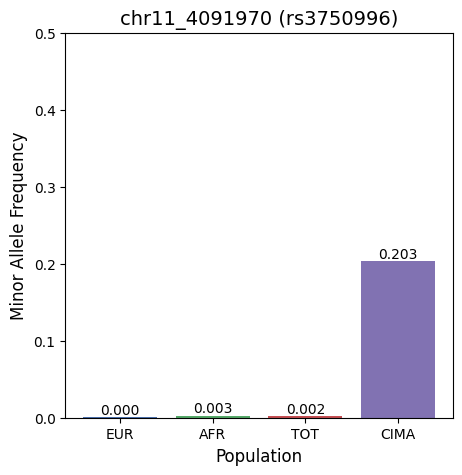

In [14]:
plot_maf(freq_csv,'chr11_4091970')

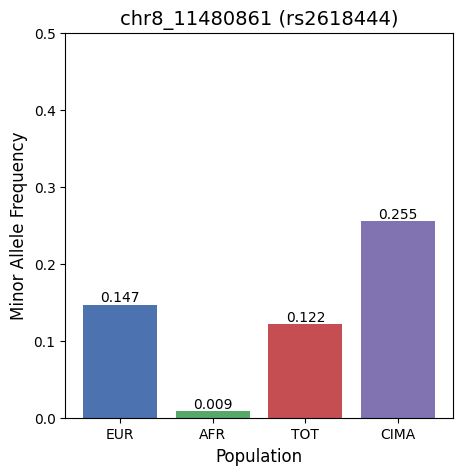

In [15]:
plot_maf(freq_csv,'chr8_11480861')

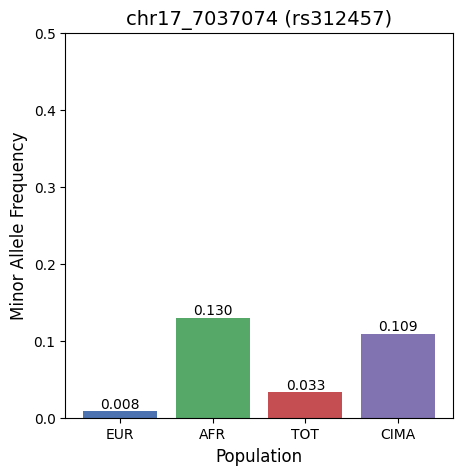

In [16]:
plot_maf(freq_csv,'chr17_7037074')

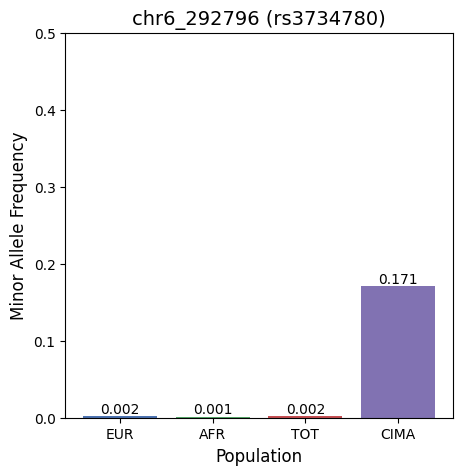

In [17]:
plot_maf(freq_csv,'chr6_292796')

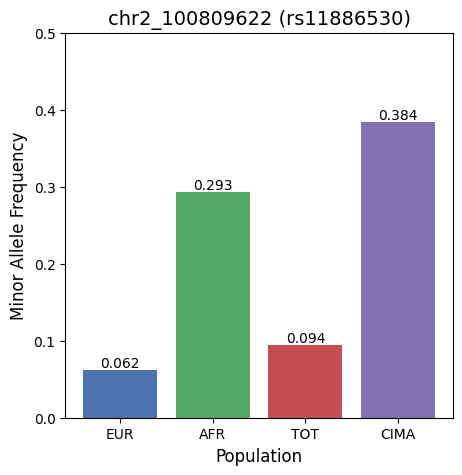

In [29]:
plot_maf(freq_csv2,'chr2_100809622')